<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/Visualization/blob/master/seaborn_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Plotting subsets of data with semantic mapping
[seanborn_scatter plots/line plots](https://seaborn.pydata.org/tutorial/relational.html)
- show up to three additional variables by modifying the hue, size and style of the plot elements.

- determine how the data get aggregated

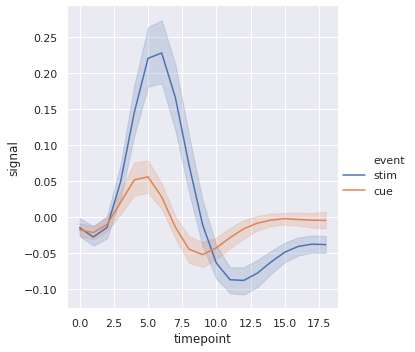

In [2]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

adding a 'style' semantic

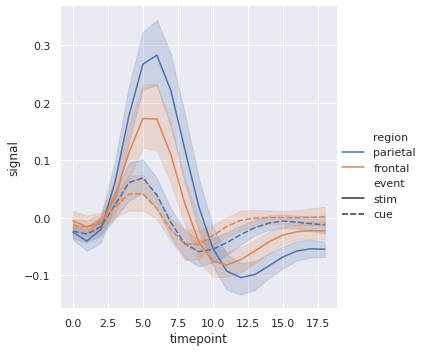

In [3]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)

we can identify subsets by the markers used at each observation

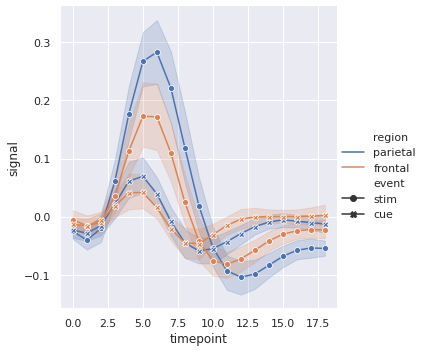

In [4]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", dashes=False,
            markers=True, kind="line", data=fmri)

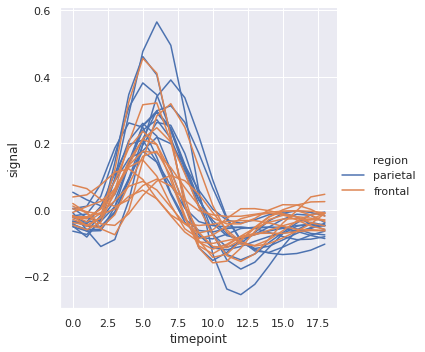

In [6]:
sns.relplot(x="timepoint", y="signal", hue="region", units="subject", estimator=None,
            kind="line", data=fmri.query("event=='stim'"))

The default colormap and handling of the legend in lineplot() also depend on whether the hue semantic is categorical or numeric

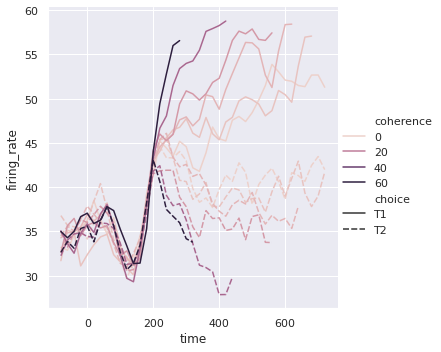

In [9]:
dots=sns.load_dataset("dots").query("align=='dots'")
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice",
            kind="line", data=dots)

- Even though the hue variable is numeric, it is poorly represented by a linear color scale.

- That's the case here where the levels of the hue variable are logarithmically sacled.


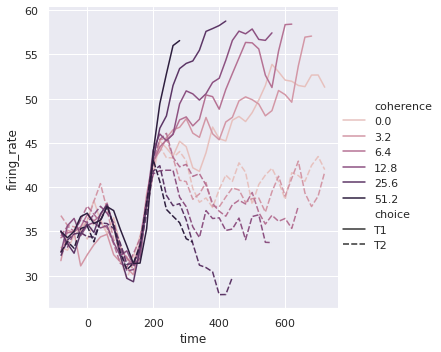

In [11]:
palette=sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice",
            palette=palette, kind="line", data=dots)

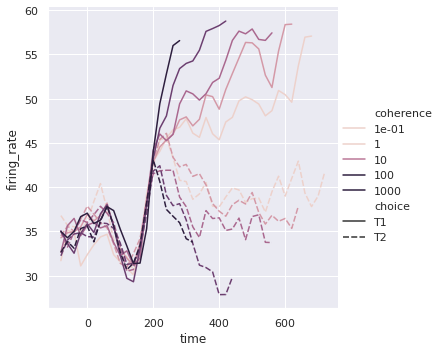

In [13]:
# alter how the colormap is normalized

from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots)

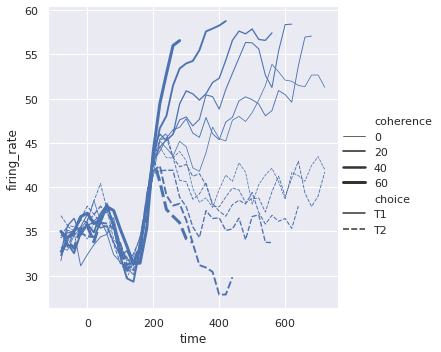

In [14]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

While the size variable will typically be numeric, it's also possible to map a categorical variable with the width of the lines

Be cautios
  - when doing so, because it will be difficult to distinguish much more than "thick" vs "thin" lines

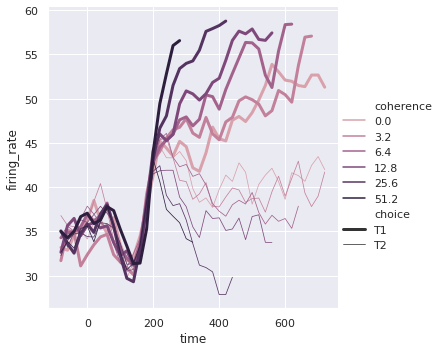

In [15]:
sns.relplot(x="time", y="firing_rate", hue="coherence", size="choice", 
            palette=palette,
            kind="line", data=dots)

### Plotting with date data
- to visualize data associated with dates and times


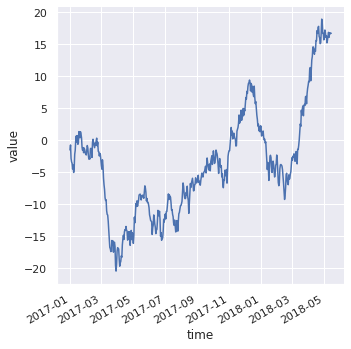

In [16]:
df=pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                     value=np.random.randn(500).cumsum()))

g= sns.relplot(x="time", y="value", kind="line", data=df)

g.fig.autofmt_xdate()

### Showing multiple relationships with facets
- to show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to "facet" the visualization.

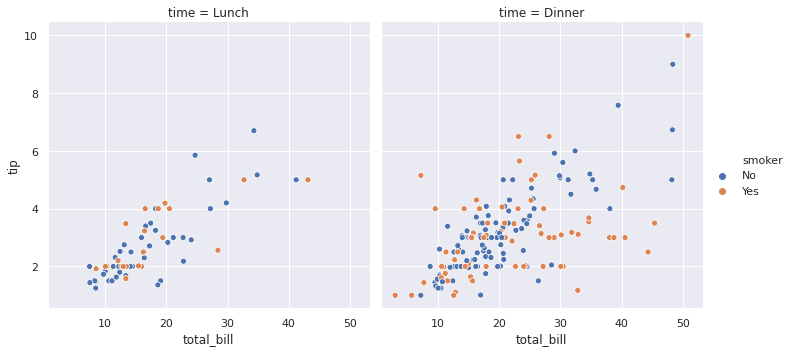

In [18]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

other way
- one by faceting on the columns and one by faceting on the rows.
- As you start adding more varibles to the grid, you may want to decrease the figure size.

- ***Remember***
    - the size FaceGrid is parameterized by the height and aspect ratio of each facet

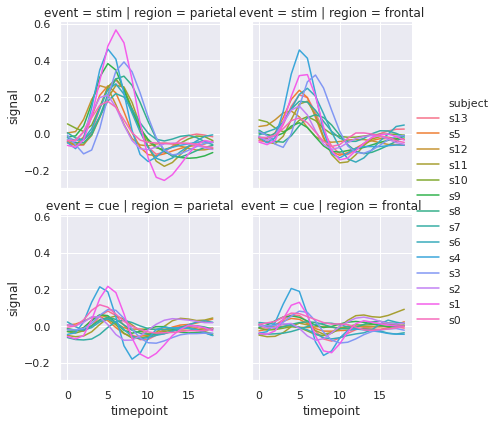

In [19]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then "wrap" the facets into the rows

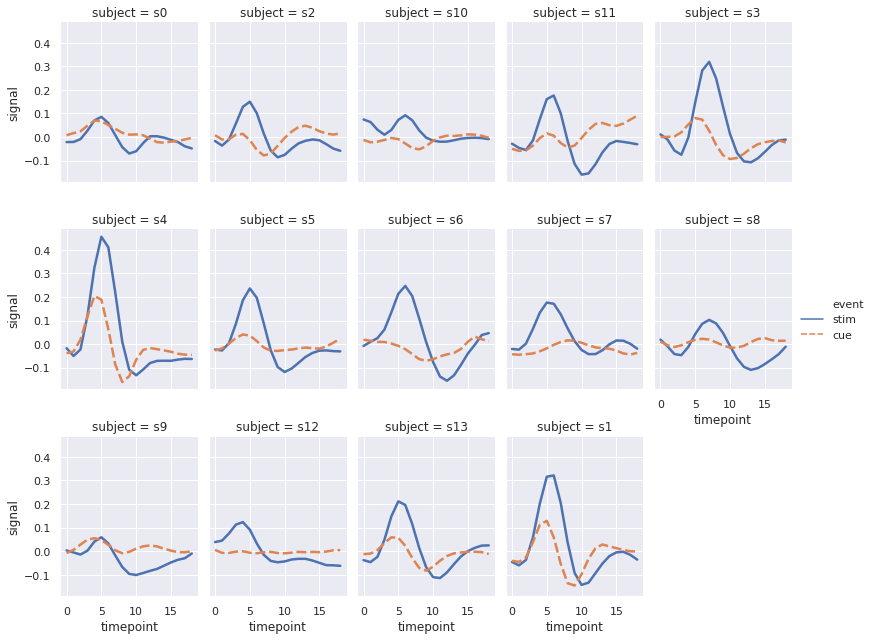

In [21]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", 
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region=='frontal'"))